In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from imblearn.combine import SMOTEENN
import sys
from ml_template.utils import *
from ml_template.model.ml_model import *
data_df = pd.read_csv('data/train.csv',sep='\t',header=None)
test_df = pd.read_csv('data/test.csv',sep='\t',header=None)

In [2]:
data = data_df.values[:,:-1]
label=(data_df.values[:,-1]+1)//2
qt = QuantileTransformer(n_quantiles=10)
data = qt.fit_transform(data)

In [3]:
# split 9:1 
train_data, train_label, test_data, test_label = KFold_Sampler(data,label,n_splits=10).get_multi_fold(n_fold=1)
print(len(train_data),len(test_data),len(test_data)/(len(train_data)+len(test_data)))

# define model list
model_lgb = lgb.LGBMClassifier(is_unbalance=True)

model_dict = {'RF_3':RandomForestClassifier(n_estimators=310,max_depth=3),
              'RF_depth_None':RandomForestClassifier(n_estimators=310),
              'XGB_31_3':XGBClassifier(n_estimators=31,max_depth=3),
              'XGB_310_3':XGBClassifier(n_estimators=31,max_depth=3),
              'XGB_31':XGBClassifier(n_estimators=31),
              'XGB_310':XGBClassifier(n_estimators=310),
              'SVM':SVC(probability=True),
              'SVM_lin':SVC(kernel='linear',probability=True),
              'SVM_rbf':SVC(kernel='rbf',probability=True),
              'SVM_0.2':SVC(C=0.2,probability=True),
              'SVM_0.2_lin':SVC(C=0.2,kernel='linear',probability=True),
              'SVM_0.2_poly':SVC(C=0.2,kernel='poly',probability=True),
              'SVM_5':SVC(C=5,probability=True),
              'SVM_5_lin':SVC(C=5,kernel='linear',probability=True),
              'SVM_5_poly':SVC(C=5,kernel='poly',probability=True),
              # 'KNN_Cls':KNeighborsClassifier(),
              'LGB_Cls':model_lgb,
              # 'Ridge_Cls':RidgeClassifier(),
              # 'MLP_Cls':MLPClassifier(activation = "relu", alpha = 0.001, hidden_layer_sizes = (56,10),
              #               learning_rate = "constant", max_iter = 3000, random_state = 3000,early_stopping=True),
              # 'QDA':QuadraticDiscriminantAnalysis(),
              }
#stack_model=MLPClassifier(activation = "relu", alpha = 0.0001,validation_fraction=0.1, hidden_layer_sizes = (38),learning_rate = "constant", max_iter = 3000, random_state = 1000,early_stopping=True)
# stack_model=SVC(C=1,kernel='linear', probability=True)
#stack_model = DecisionTreeClassifier()
num_model = len(list(model_dict.keys()))
num_classes=2
stack_model=ML_Weighted_Model(num_model,
                              num_classes,
                              epoch=1000,
                              model_reg=0.00,
                              classes_reg=0.00,
                              l1_norm=0.00)
model = Stack_Ensemble_Proba_Model(copy.deepcopy(model_dict),stack_model=stack_model,stack_training_split=0.2)
# model = Mean_Ensemble_Proba_Model(copy.deepcopy(model_dict))
cv_model, cv_df = model.cross_validation_evaluate(train_data, train_label, accuracy_score,n_splits=5)

90 10 0.1


===== Model pre-training evaluation =====
            model  eval_metric
0            RF_3     0.200000
1           SVM_5     0.200000
2   RF_depth_None     0.266667
3        XGB_31_3     0.266667
4       XGB_310_3     0.266667
5          XGB_31     0.266667
6         XGB_310     0.266667
7             SVM     0.266667
8         SVM_lin     0.266667
9         SVM_rbf     0.266667
10   SVM_0.2_poly     0.266667
11        LGB_Cls     0.266667
12      SVM_5_lin     0.400000
13     SVM_5_poly     0.400000
14        SVM_0.2     0.466667
15    SVM_0.2_lin     0.533333
RF_3 : [0. 0.]
RF_depth_None : [0. 0.]
XGB_31_3 : [0.282 0.282]
XGB_310_3 : [0.282 0.282]
XGB_31 : [0.2 0.2]
XGB_310 : [0.237 0.237]
SVM : [0. 0.]
SVM_lin : [0. 0.]
SVM_rbf : [0. 0.]
SVM_0.2 : [0. 0.]
SVM_0.2_lin : [0. 0.]
SVM_0.2_poly : [0. 0.]
SVM_5 : [0. 0.]
SVM_5_lin : [0. 0.]
SVM_5_poly : [0. 0.]
LGB_Cls : [0. 0.]




====== CV:0 ======
             model  eval_metric
0      SVM_0.2_lin     0.500000
1          LGB_Cls     0.555556
2        SVM_5_lin     0.666667
3          SVM_lin     0.666667
4    RF_depth_None     0.722222
5       SVM_5_poly     0.722222
6             RF_3     0.777778
7          XGB_310     0.777778
8          SVM_0.2     0.777778
9   Ensemble Model     0.833333
10       XGB_310_3     0.833333
11        XGB_31_3     0.833333
12          XGB_31     0.888889
13    SVM_0.2_poly     0.888889
14             SVM     0.888889
15         SVM_rbf     0.888889
16           SVM_5     0.944444


===== Model pre-training evaluation =====
            model  eval_metric
0           SVM_5     0.066667
1    SVM_0.2_poly     0.133333
2             SVM     0.200000
3         SVM_rbf     0.200000
4   RF_depth_None     0.266667
5      SVM_5_poly     0.266667
6            RF_3     0.333333
7        XGB_31_3     0.333333
8       XGB_310_3     0.333333
9          XGB_31     0.333333
10        XGB_310     0.333333
11      SVM_5_lin     0.333333
12        LGB_Cls     0.333333
13        SVM_lin     0.466667
14        SVM_0.2     0.466667
15    SVM_0.2_lin     0.466667
RF_3 : [0. 0.]
RF_depth_None : [0. 0.]
XGB_31_3 : [0. 0.]
XGB_310_3 : [0. 0.]
XGB_31 : [0. 0.]
XGB_310 : [0. 0.]
SVM : [0. 0.]
SVM_lin : [0. 0.]
SVM_rbf : [0. 0.]
SVM_0.2 : [0. 0.]
SVM_0.2_lin : [0. 0.]
SVM_0.2_poly : [0. 0.]
SVM_5 : [1. 1.]
SVM_5_lin : [0. 0.]
SVM_5_poly : [0. 0.]
LGB_Cls : [0. 0.]




====== CV:1 ======
             model  eval_metric
0      SVM_0.2_lin     0.555556
1          LGB_Cls     0.555556
2       SVM_5_poly     0.611111
3              SVM     0.611111
4             RF_3     0.666667
5     SVM_0.2_poly     0.666667
6          SVM_0.2     0.666667
7          SVM_rbf     0.666667
8          XGB_310     0.666667
9           XGB_31     0.666667
10   RF_depth_None     0.666667
11         SVM_lin     0.666667
12       XGB_310_3     0.722222
13        XGB_31_3     0.722222
14           SVM_5     0.722222
15  Ensemble Model     0.722222
16       SVM_5_lin     0.777778


===== Model pre-training evaluation =====
            model  eval_metric
0        XGB_31_3     0.200000
1       XGB_310_3     0.200000
2             SVM     0.200000
3         SVM_rbf     0.200000
4    SVM_0.2_poly     0.200000
5           SVM_5     0.200000
6          XGB_31     0.266667
7         XGB_310     0.266667
8      SVM_5_poly     0.266667
9   RF_depth_None     0.400000
10           RF_3     0.466667
11        SVM_0.2     0.466667
12    SVM_0.2_lin     0.466667
13      SVM_5_lin     0.466667
14        LGB_Cls     0.466667
15        SVM_lin     0.533333
RF_3 : [0. 0.]
RF_depth_None : [0. 0.]
XGB_31_3 : [0.153 0.153]
XGB_310_3 : [0.153 0.153]
XGB_31 : [0. 0.]
XGB_310 : [0. 0.]
SVM : [0. 0.]
SVM_lin : [0. 0.]
SVM_rbf : [0. 0.]
SVM_0.2 : [0. 0.]
SVM_0.2_lin : [0. 0.]
SVM_0.2_poly : [0.264 0.264]
SVM_5 : [0.43 0.43]
SVM_5_lin : [0. 0.]
SVM_5_poly : [0. 0.]
LGB_Cls : [0. 0.]




====== CV:2 ======
             model  eval_metric
0          SVM_0.2     0.555556
1              SVM     0.555556
2          SVM_rbf     0.611111
3            SVM_5     0.611111
4   Ensemble Model     0.611111
5          XGB_310     0.666667
6          SVM_lin     0.666667
7          LGB_Cls     0.666667
8      SVM_0.2_lin     0.666667
9     SVM_0.2_poly     0.666667
10       SVM_5_lin     0.666667
11      SVM_5_poly     0.666667
12       XGB_310_3     0.722222
13        XGB_31_3     0.722222
14   RF_depth_None     0.722222
15          XGB_31     0.722222
16            RF_3     0.722222


===== Model pre-training evaluation =====
            model  eval_metric
0             SVM     0.333333
1         SVM_rbf     0.333333
2           SVM_5     0.333333
3      SVM_5_poly     0.400000
4            RF_3     0.466667
5         SVM_lin     0.466667
6         SVM_0.2     0.466667
7     SVM_0.2_lin     0.466667
8    SVM_0.2_poly     0.466667
9   RF_depth_None     0.533333
10       XGB_31_3     0.533333
11      XGB_310_3     0.533333
12        LGB_Cls     0.533333
13         XGB_31     0.600000
14        XGB_310     0.600000
15      SVM_5_lin     0.600000
RF_3 : [0. 0.]
RF_depth_None : [0. 0.]
XGB_31_3 : [0. 0.]
XGB_310_3 : [0. 0.]
XGB_31 : [0. 0.]
XGB_310 : [0. 0.]
SVM : [0.054 0.054]
SVM_lin : [0. 0.]
SVM_rbf : [0.111 0.111]
SVM_0.2 : [0. 0.]
SVM_0.2_lin : [0.324 0.324]
SVM_0.2_poly : [0. 0.]
SVM_5 : [0.39 0.39]
SVM_5_lin : [0. 0.]
SVM_5_poly : [0.122 0.122]
LGB_Cls : [0. 0.]




====== CV:3 ======
             model  eval_metric
0      SVM_0.2_lin     0.555556
1          SVM_0.2     0.555556
2          SVM_lin     0.555556
3       SVM_5_poly     0.611111
4        SVM_5_lin     0.611111
5              SVM     0.666667
6          SVM_rbf     0.722222
7            SVM_5     0.722222
8   Ensemble Model     0.777778
9    RF_depth_None     0.777778
10         XGB_310     0.833333
11          XGB_31     0.833333
12    SVM_0.2_poly     0.833333
13         LGB_Cls     0.833333
14            RF_3     0.833333
15       XGB_310_3     0.888889
16        XGB_31_3     0.888889


===== Model pre-training evaluation =====
            model  eval_metric
0           SVM_5     0.200000
1            RF_3     0.266667
2          XGB_31     0.266667
3         XGB_310     0.266667
4      SVM_5_poly     0.266667
5        XGB_31_3     0.333333
6       XGB_310_3     0.333333
7             SVM     0.333333
8         SVM_rbf     0.333333
9    SVM_0.2_poly     0.333333
10  RF_depth_None     0.400000
11        SVM_lin     0.400000
12      SVM_5_lin     0.400000
13        LGB_Cls     0.400000
14        SVM_0.2     0.466667
15    SVM_0.2_lin     0.733333
RF_3 : [0. 0.]
RF_depth_None : [0. 0.]
XGB_31_3 : [0.081 0.081]
XGB_310_3 : [0.081 0.081]
XGB_31 : [0.306 0.306]
XGB_310 : [0. 0.]
SVM : [0.209 0.209]
SVM_lin : [0. 0.]
SVM_rbf : [0.053 0.053]
SVM_0.2 : [0. 0.]
SVM_0.2_lin : [0. 0.]
SVM_0.2_poly : [0. 0.]
SVM_5 : [0.27 0.27]
SVM_5_lin : [0. 0.]
SVM_5_poly : [0. 0.]
LGB_Cls : [0. 0.]




====== CV:4 ======
             model  eval_metric
0      SVM_0.2_lin     0.500000
1          SVM_lin     0.500000
2        SVM_5_lin     0.611111
3         XGB_31_3     0.666667
4        XGB_310_3     0.666667
5          XGB_310     0.666667
6          LGB_Cls     0.666667
7             RF_3     0.722222
8          SVM_rbf     0.722222
9           XGB_31     0.722222
10   RF_depth_None     0.722222
11             SVM     0.722222
12  Ensemble Model     0.722222
13         SVM_0.2     0.777778
14           SVM_5     0.777778
15      SVM_5_poly     0.833333
16    SVM_0.2_poly     0.888889

====== CV Mean ======
             model  eval_metric
0      SVM_0.2_lin     0.555556
1          SVM_lin     0.611111
2          LGB_Cls     0.655556
3          SVM_0.2     0.666667
4        SVM_5_lin     0.666667
5              SVM     0.688889
6       SVM_5_poly     0.688889
7    RF_depth_None     0.722222
8          XGB_310     0.722222
9          SVM_rbf     0.722222
10  Ensemble Model     0.733

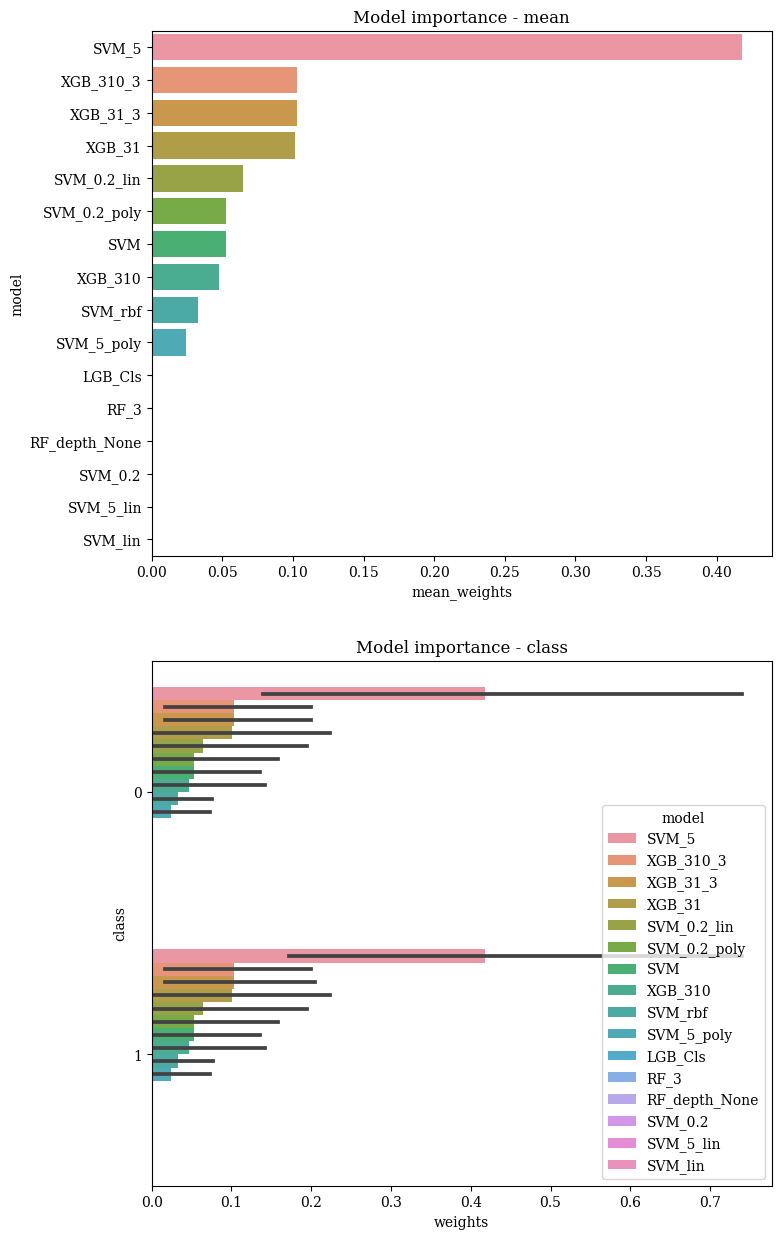

=========== Model Classes Importance ============
model
SVM_5            0.4180
XGB_310_3        0.1032
XGB_31_3         0.1032
XGB_31           0.1012
SVM_0.2_lin      0.0648
SVM_0.2_poly     0.0528
SVM              0.0526
XGB_310          0.0474
SVM_rbf          0.0328
SVM_5_poly       0.0244
LGB_Cls          0.0000
RF_3             0.0000
RF_depth_None    0.0000
SVM_0.2          0.0000
SVM_5_lin        0.0000
SVM_lin          0.0000
Name: weights, dtype: float32
                     weights
class model                 
0     SVM_5           0.4180
      XGB_310_3       0.1032
      XGB_31_3        0.1032
      XGB_31          0.1012
      SVM_0.2_lin     0.0648
      SVM_0.2_poly    0.0528
      SVM             0.0526
      XGB_310         0.0474
      SVM_rbf         0.0328
      SVM_5_poly      0.0244
      LGB_Cls         0.0000
      RF_3            0.0000
      RF_depth_None   0.0000
      SVM_0.2         0.0000
      SVM_5_lin       0.0000
      SVM_lin         0.0000
1     SV

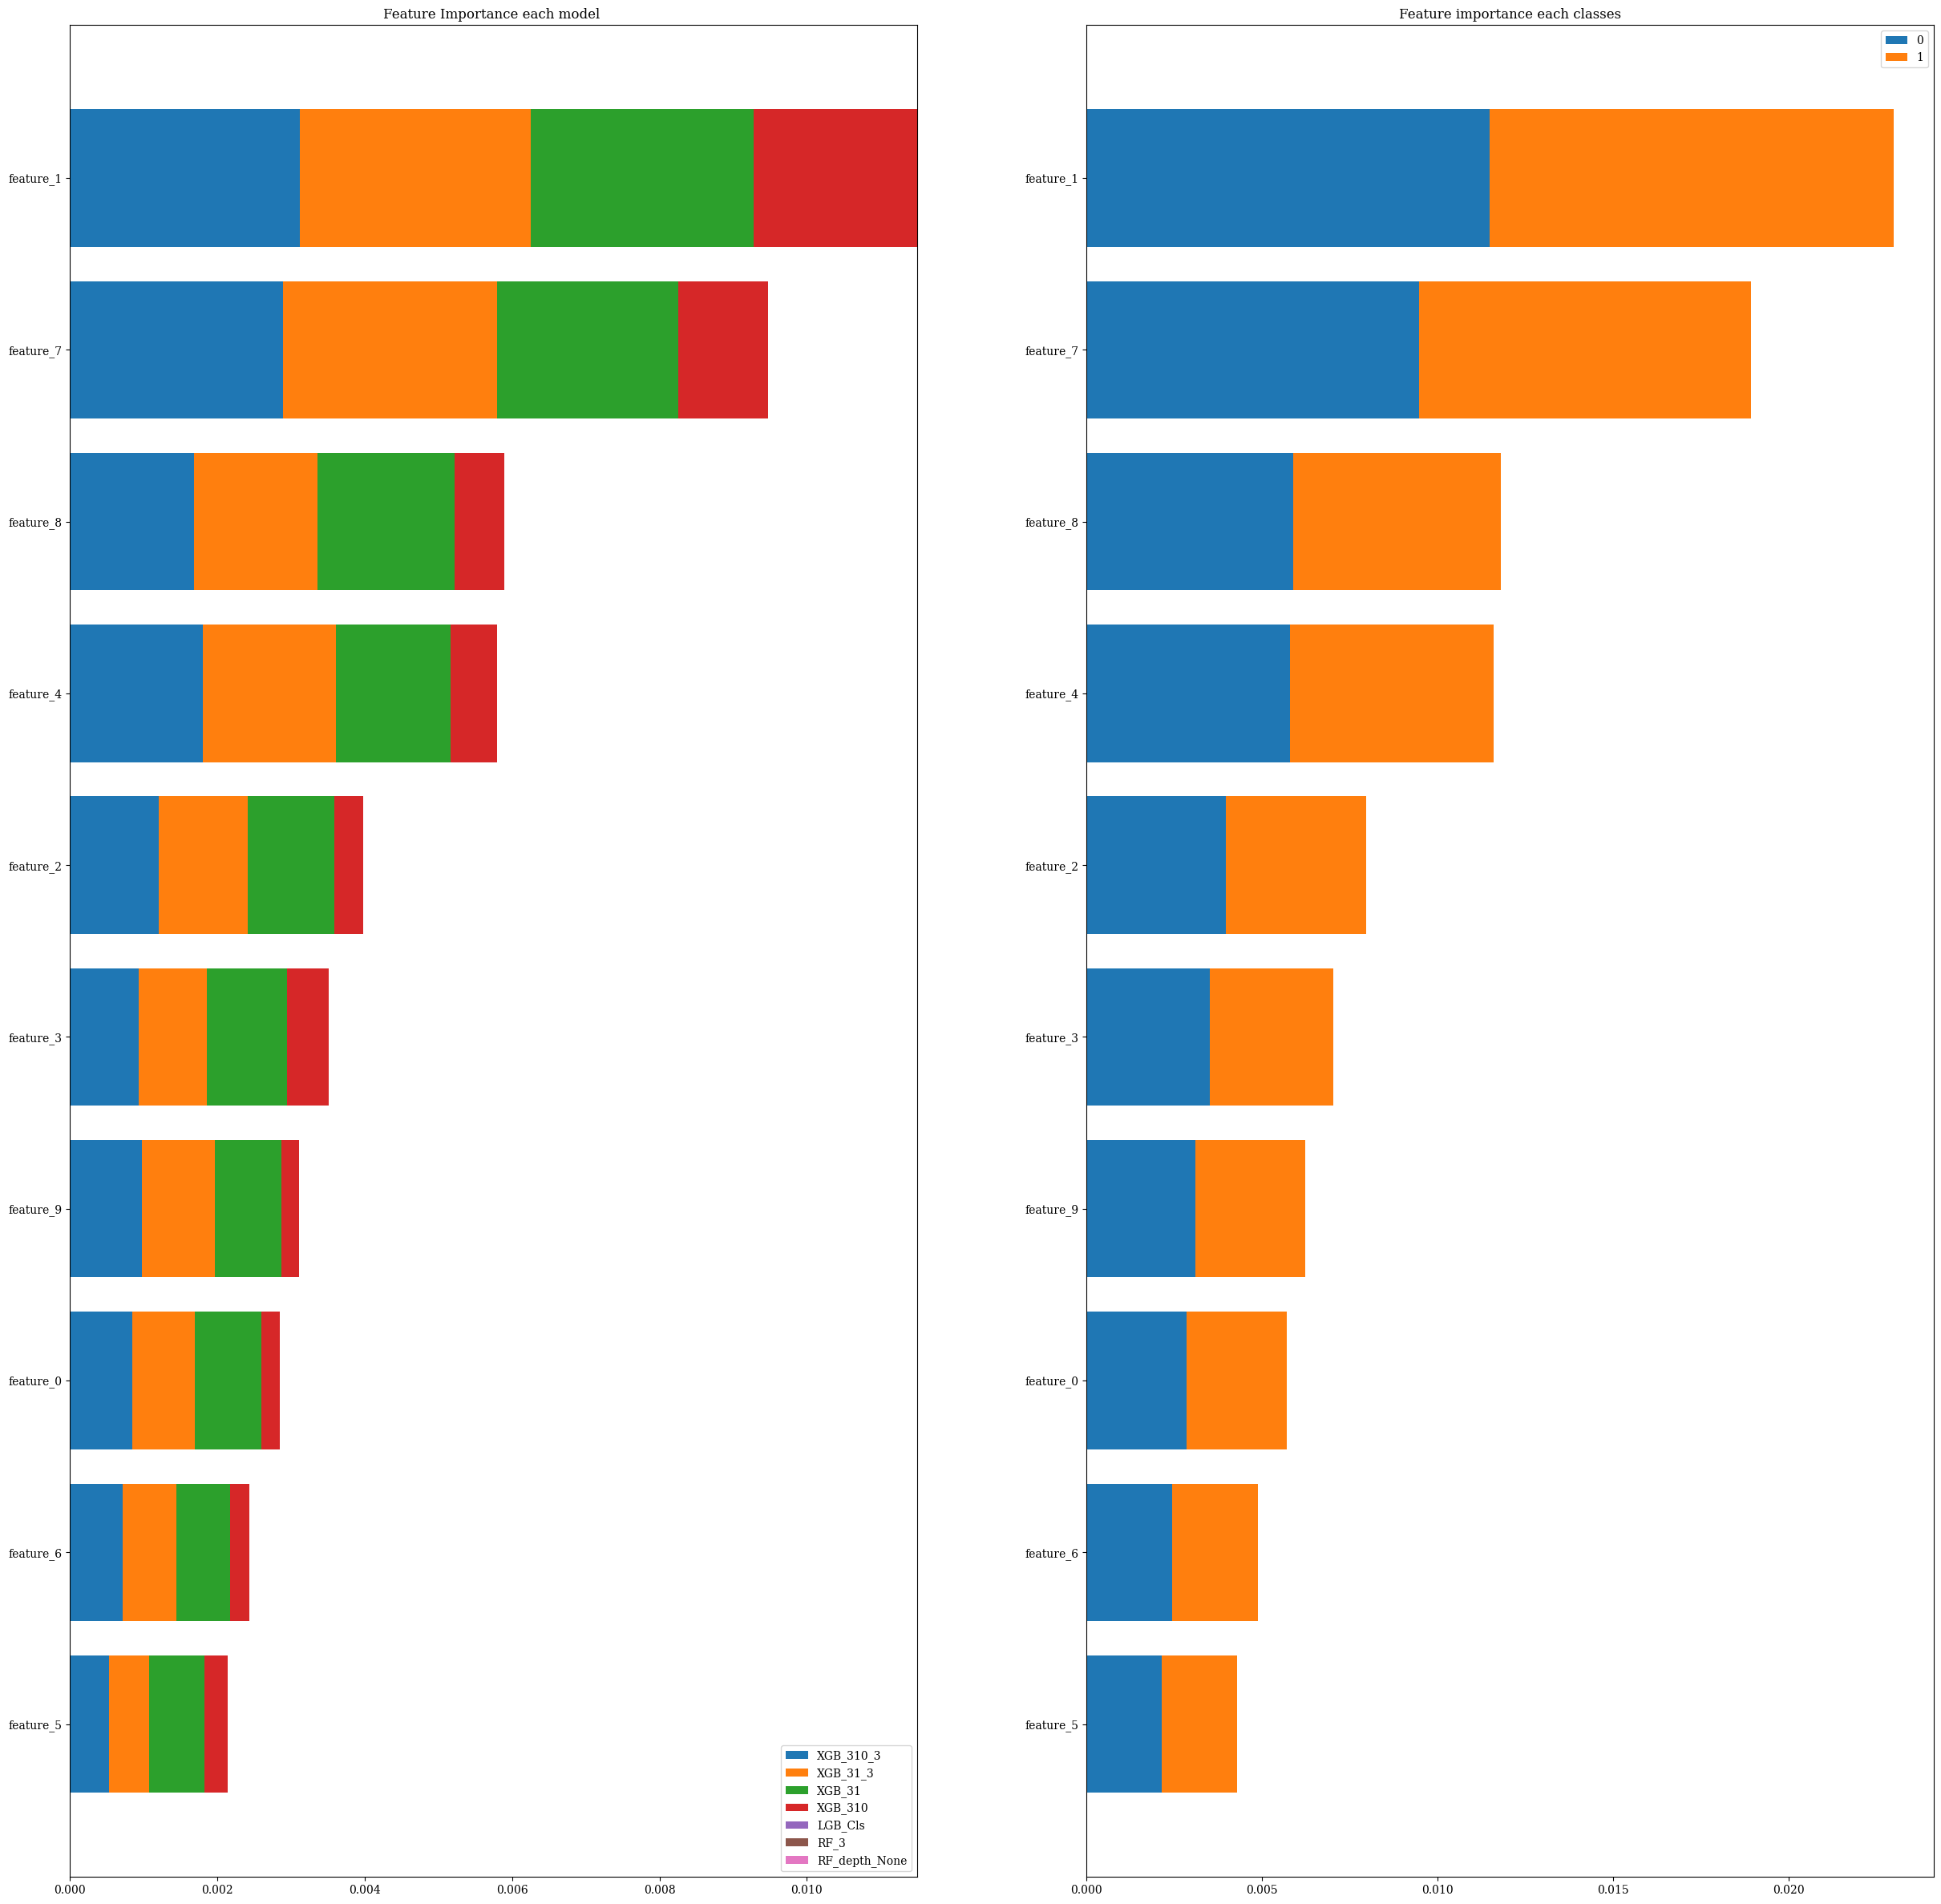

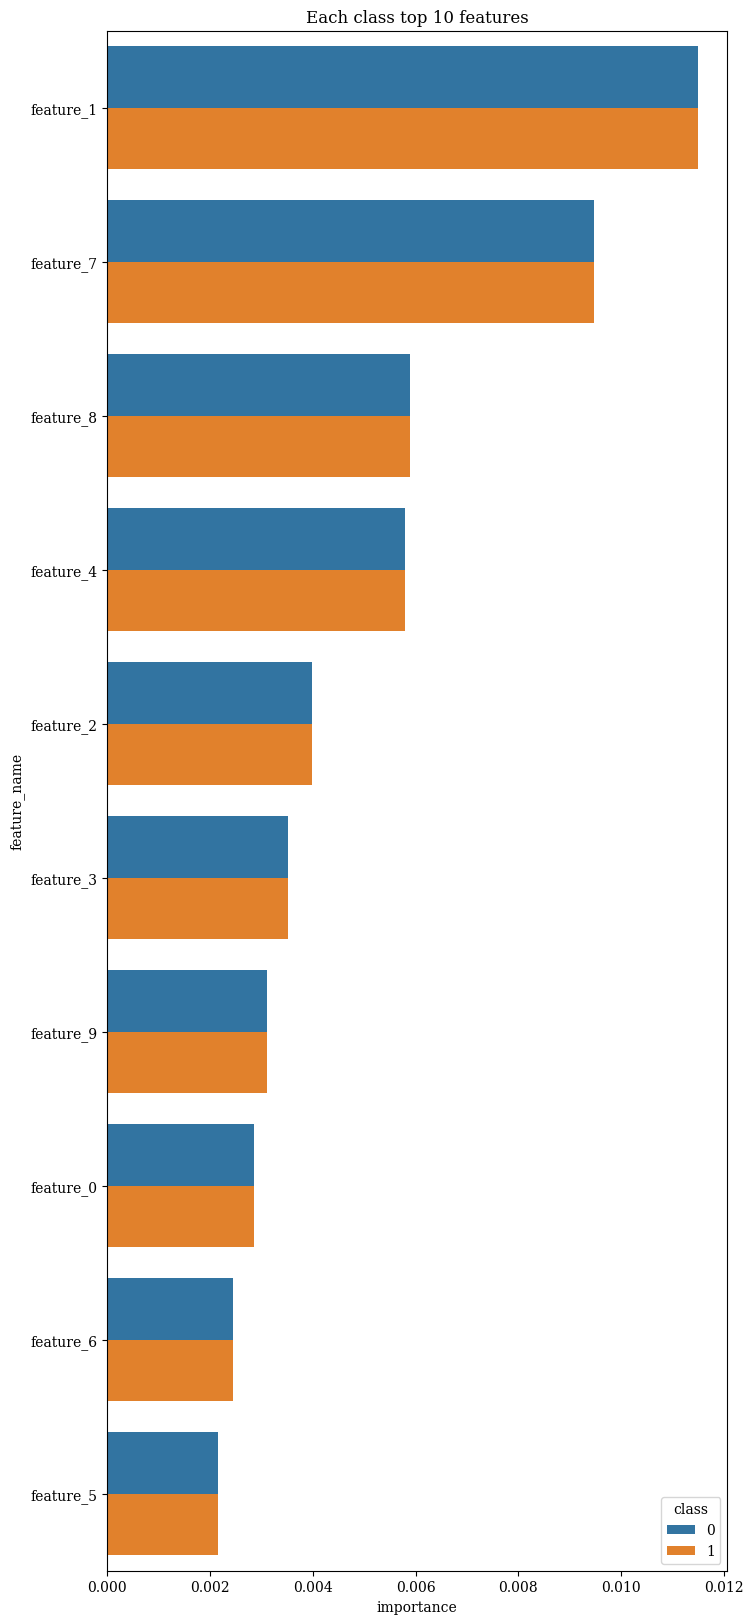

   class feature_name  importance  mean_importance
0      0    feature_1    0.011492         0.011492
3      0    feature_7    0.009471         0.009471
5      0    feature_8    0.005900         0.005900
6      0    feature_4    0.005797         0.005797
8      0    feature_2    0.003984         0.003984
10     0    feature_3    0.003519         0.003519
12     0    feature_9    0.003111         0.003111
14     0    feature_0    0.002852         0.002852
16     0    feature_6    0.002441         0.002441
18     0    feature_5    0.002148         0.002148
1      1    feature_1    0.011492         0.011492
2      1    feature_7    0.009471         0.009471
4      1    feature_8    0.005900         0.005900
7      1    feature_4    0.005797         0.005797
9      1    feature_2    0.003984         0.003984
11     1    feature_3    0.003519         0.003519
13     1    feature_9    0.003111         0.003111
15     1    feature_0    0.002852         0.002852
17     1    feature_6    0.0024

In [8]:
stacking_analysis_df = weighted_stacking_analysis(cv_model, [f'feature_{i}'for i in range(10)])

In [5]:

#stack_model = DecisionTreeClassifier()
# cv_ensemble_model = Stack_Ensemble_Proba_Model(model_dict=cv_model, stack_model=copy.deepcopy(stack_model), stack_training_split=0.3)
cv_ensemble_model = Mean_Ensemble_Proba_Model(cv_model)
# cv_ensemble_model.fit(train_data,train_label)
# # cv_ensemble_model.fit(train_data,train_label)
# print('========== Ensemble Model ==========')
# _=model.evaluate(test_data,test_label,evaluation_fn=accuracy_score,verbose=True)
print('========== CV Ensemble Model ==========')
_=cv_ensemble_model.evaluate(test_data,test_label,evaluation_fn=accuracy_score,verbose=True)

========== CV Ensemble Model ==========
            model  eval_metric
0         model_1          0.8
1         model_5          0.8
2         model_3          0.9
3         model_4          0.9
4         model_2          1.0
5  Ensemble Model          1.0


In [6]:
_=cv_ensemble_model.evaluate(train_data,train_label,accuracy_score)

            model  eval_metric
0         model_3     0.922222
1         model_2     0.944444
2         model_5     0.944444
3         model_4     0.955556
4         model_1     0.966667
5  Ensemble Model     1.000000


In [7]:
test_data = test_df.values[:,1:]
test_pred = cv_ensemble_model.predict(test_data)
test_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,